In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression



## Load the data

In [3]:
DATA_DIR = os.path.join(os.path.expanduser('~'), 'david', 'regresión_lineal_con_scikit_learn', 'data', 'external', 'cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv')

In [4]:
df = pd.read_csv(DATA_DIR)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.shape

(569, 32)

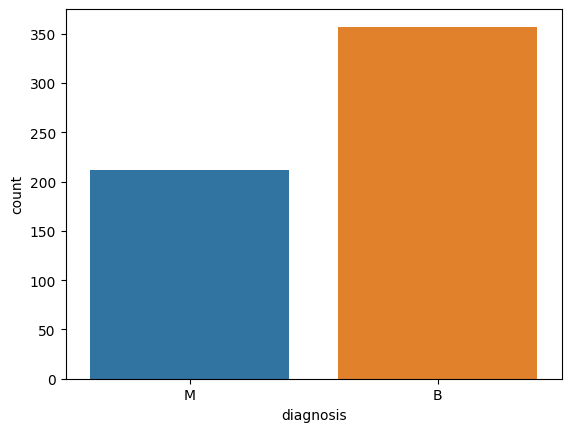

In [8]:
sns.countplot(x='diagnosis', data=df)
plt.show()

In [9]:
df.drop('id',axis=1,inplace=True)

## Binary values for 'diagnosis'

In [10]:
df['diagnosis'].replace(to_replace='M', value = 1, inplace=True)
df['diagnosis'].replace(to_replace='B', value = 0, inplace=True)

In [11]:
df_data_processing = df.copy()

## Correlation calculation

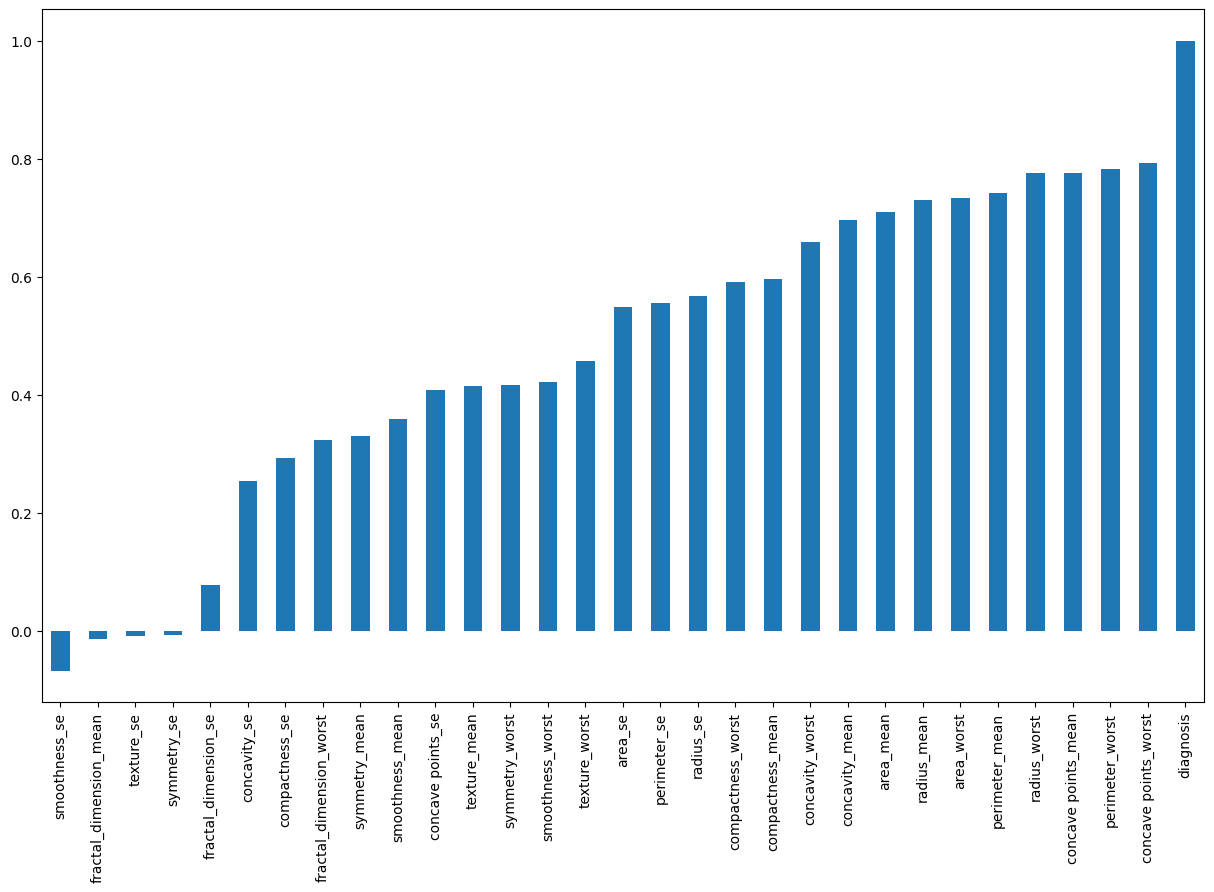

In [12]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Standardize the data

In [13]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [14]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [15]:
df_data_processing_scaled.columns = df_data_processing.columns

In [16]:
df_data_processing_scaled.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [17]:
#fig = plt.figure(figsize=(10,10))
#sns.pairplot(data= df, hue='diagnosis')
#plt.show()

## Split the data into training and testing sets

In [18]:
X = df_data_processing_scaled.drop('diagnosis',axis=1)
y = df_data_processing_scaled['diagnosis'].values

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

## Logistic Regression and results

In [20]:

model = LogisticRegression()
result = model.fit(X_train, y_train)

In [21]:

prediction_test = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,prediction_test)
print('Accuracy of the Logistic Regression Model is {}.'.format(round(accuracy, 4)))


Accuracy of the Logistic Regression Model is 0.9912.


In [22]:
model.predict_proba(X_test)

array([[4.62696033e-01, 5.37303967e-01],
       [9.17748797e-01, 8.22512028e-02],
       [9.70709428e-01, 2.92905722e-02],
       [4.28671602e-01, 5.71328398e-01],
       [9.70256788e-01, 2.97432119e-02],
       [1.21376375e-01, 8.78623625e-01],
       [9.14570561e-01, 8.54294389e-02],
       [9.72829126e-01, 2.71708744e-02],
       [9.44877608e-01, 5.51223918e-02],
       [8.00487286e-01, 1.99512714e-01],
       [9.67251144e-01, 3.27488562e-02],
       [8.40035765e-01, 1.59964235e-01],
       [9.93577260e-01, 6.42273962e-03],
       [5.93992006e-03, 9.94060080e-01],
       [1.37817045e-01, 8.62182955e-01],
       [9.38690757e-01, 6.13092427e-02],
       [9.60568586e-01, 3.94314137e-02],
       [9.56013936e-01, 4.39860635e-02],
       [9.86935280e-01, 1.30647201e-02],
       [1.46611469e-03, 9.98533885e-01],
       [8.95322558e-01, 1.04677442e-01],
       [6.68924669e-01, 3.31075331e-01],
       [1.21007162e-01, 8.78992838e-01],
       [9.74592148e-01, 2.54078520e-02],
       [9.662706

In [23]:
model.coef_

array([[ 1.83584473,  1.5081912 ,  1.80065117,  1.54097502,  0.61491437,
         0.35146973,  1.37411407,  1.98000498,  0.39005045, -0.96146826,
         1.22993172,  0.10616883,  0.9962038 ,  0.80698455, -0.01923097,
        -0.5343668 , -0.24118119,  0.27881457, -0.1756255 , -0.62409053,
         2.31888087,  2.05444099,  2.1472017 ,  1.67113092,  1.29806987,
         0.71984253,  1.31539851,  2.45701604,  1.13592788,  0.21645568]])

In [24]:
model.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


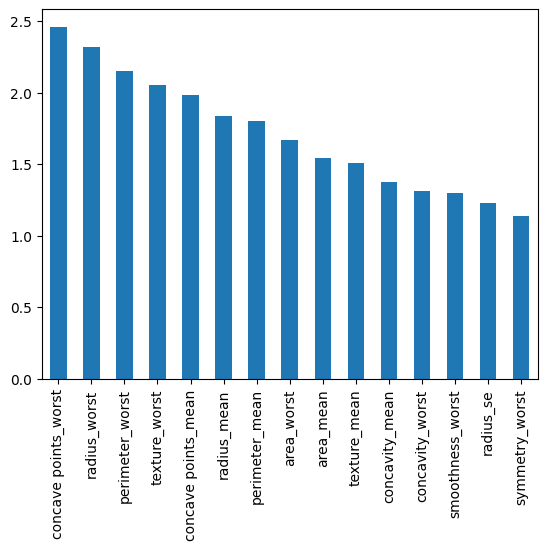

In [25]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:15].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


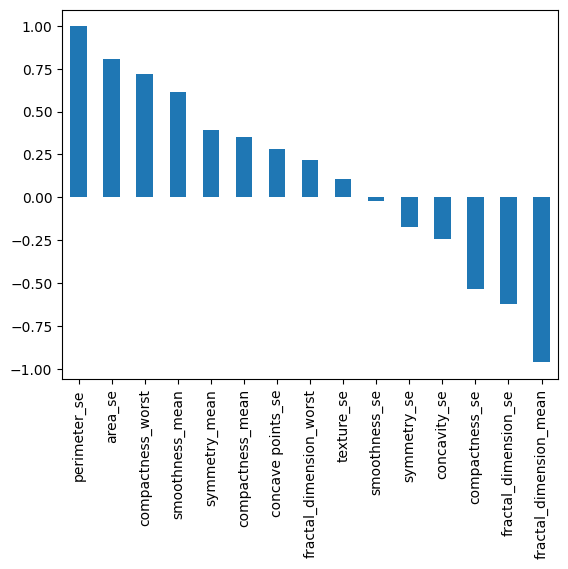

In [26]:
print(weights.sort_values(ascending=False)[-15:].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

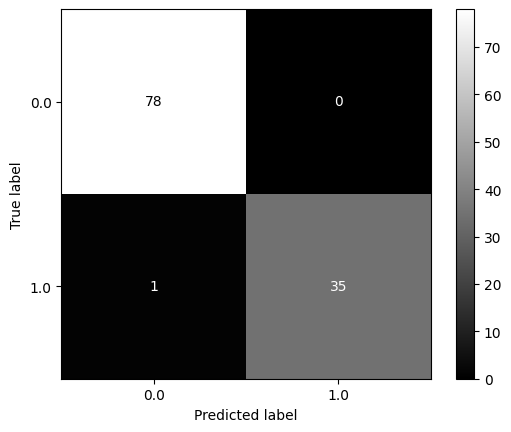

In [27]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()